# Import packages

In [73]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load files

In [75]:
# After this process, the 'k'th subject's data will be pasted on study(or test)_list['k'] 

study_list = [None]
test_list = [None]

for i in range(31):
    if i <= 8:
        study_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_study.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))
        test_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_test.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))
    else :
        study_list.append(pd.read_csv('./DMdata/DM{}/DM{}_study.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))
        test_list.append(pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(i+1,i+1), sep = "\t", engine='python', index_col = False))


# Display the 2nd subject's study data

display(study_list[2])

# Print the 17th subject's test data

print(test_list[17])

,Trial,ObjID,LocID,FB,Task,RT,Stim
0,1,44,3,1,-2,1500,4015
1,2,126,1,1,-2,1500,10027
2,3,185,2,1,-2,1283,16025
3,4,86,4,1,-2,632,24023
4,5,137,2,1,-2,965,32021
...,...,...,...,...,...,...,...
259,260,199,4,1,-1,616,695931
260,261,250,3,1,-1,1015,701930
261,262,4,2,1,-1,615,709928
262,263,128,4,1,-1,750,715925


     Trial  Object_ID  Task_Type  Stim_onset1   RT1  Res1  Stim_onset2   RT2  \
0        1        213          0         1006  2224     1         4966   565   
1        2        236          1         6664   761     4            0     0   
2        3         35          0        10176   329     1        12240   365   
3        4        217          0        13621   828     1        16185  1630   
4        5        128          0        18948   795     1        21478   514   
..     ...        ...        ...          ...   ...   ...          ...   ...   
523    524        146          0      1780321   245     1      1782302   182   
524    525        189          1      1783617   395     4            0     0   
525    526         10          1      1786763   612     4            0     0   
526    527        160          1      1790125   528     4            0     0   
527    528        170          1      1793404   312     4            0     0   

     Res2  
0       4  
1       0  
2  

# Add a column whose name is "Res_Type"

In [76]:
# Add a column whose name is "Res_Type"
conditions = []

values = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
for h in range(31):
    conditions.append([(test_list[h+1]['Task_Type']==a) & (test_list[h+1]['Res1']==b) for a in range(2) for b in range(1,5)])

    
for i in range(31):
    test_list[i+1]["Res_Type"]= np.select(conditions[i], values)

In [77]:
# Check whether the prior code properly worked by comparing 264rows vs 264rows

X = test_list[2][test_list[2]['Task_Type']==0]
Y = test_list[2][test_list[2]['Res_Type'].isin(values[:4])]

len(X) == len(Y)

True

# 7. Sort 528 trials in Test for 8 different response types and calculate the probability for each of them

In [78]:
# Memory Score data of each subject
# After this process, every subject's response rate data will be pasted on MScores. 

HitnMiss = values[:4]
CRnFA = values[4:]
ResRates = [None]

for k in range(1,32):
    #divide test_list into old/new to normalize respectively
    old = test_list[k][test_list[k]['Res_Type'].isin(HitnMiss)]['Res_Type'].value_counts(normalize=True)
    new = test_list[k][test_list[k]['Res_Type'].isin(CRnFA)]['Res_Type'].value_counts(normalize=True)
   
    #concatenate them again and make'em into DF
    df = pd.concat([old,new], axis = 0)
    X = pd.Series(df, name="Response rate").to_frame()
    X.index.name = 'Res Type'
    Y = X.reindex(index=values)
    Z = Y.reset_index()
    
    #Add a column whose name is 'Task Type (Old/New)'
    Z["Task Type"] = Z["Res Type"].isin(HitnMiss)
    Z['Task Type'] = Z['Task Type'].replace([True, False],['Old','New'])
    ResRates.append(Z)


#Just check

print(ResRates[1], "\n\n", ResRates[27])
    

  Res Type  Response rate Task Type
0   HIT-HC       0.670455       Old
1   HIT-LC       0.140152       Old
2  MISS-LC       0.106061       Old
3  MISS-HC       0.083333       Old
4    FA-HC       0.030303       New
5    FA-LC       0.094697       New
6    CR-LC       0.344697       New
7    CR-HC       0.530303       New 

   Res Type  Response rate Task Type
0   HIT-HC       0.181818       Old
1   HIT-LC       0.234848       Old
2  MISS-LC       0.556818       Old
3  MISS-HC       0.026515       Old
4    FA-HC       0.056818       New
5    FA-LC       0.268939       New
6    CR-LC       0.647727       New
7    CR-HC       0.026515       New


# 8. Write a function performing the sort with an argument of subject ID


,Res Type,Response rate,Task Type
0,HIT-HC,0.299242,Old
1,HIT-LC,0.280303,Old
2,MISS-LC,0.181818,Old
3,MISS-HC,0.238636,Old
4,FA-HC,0.034091,New
5,FA-LC,0.155303,New
6,CR-LC,0.321970,New
7,CR-HC,0.488636,New


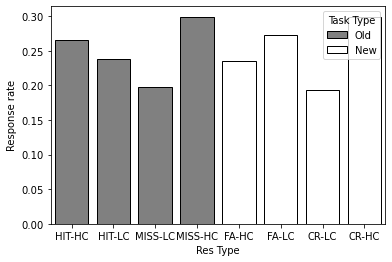

In [79]:
# A function shows you his Response rate table when you input the subject's id

def subject_ResRates(id):
    return ResRates[id]


# A function shows you his Response rate table when you input the subject's id

def subject_ResRates_bar(id):
    palette ={"Old": "gray", "New": "white"}
    ax = sns.barplot(x="Res Type", y="Response rate", hue="Task Type", data=ResRates[id], palette = palette, dodge=False, edgecolor='k')    
    
    
    
display(subject_ResRates(7))    

subject_ResRates_bar(21)
    

# 9. Run the function for 31 subjects and plot the mean and error bas as histogram (see the pdf file and my paper)

,Res Type,Response rate,Task Type
0,HIT-HC,0.670455,Old
1,HIT-LC,0.140152,Old
2,MISS-LC,0.106061,Old
3,MISS-HC,0.083333,Old
4,FA-HC,0.030303,New
...,...,...,...
3,MISS-HC,0.318182,Old
4,FA-HC,0.087121,New
5,FA-LC,0.079545,New
6,CR-LC,0.337121,New


None


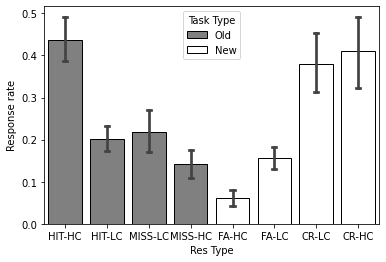

In [80]:
def meanplot_with_errorbar():
    tmp = [subject_ResRates(i) for i in range(1,32)]
    
    # All the necessary data of every subject including 'Task Type' column will be pasted on 'Bulky'
    Bulky = pd.concat(tmp)
    Bulky["Task Type"] = Bulky["Res Type"].isin(HitnMiss)
    Bulky['Task Type'] = Bulky['Task Type'].replace([True, False],['Old', 'New'])
    display(Bulky)

    # Plot with error bar & differentiate the color by 'Task Type'
    palette ={"Old": "gray", "New": "white"}
    ax = sns.barplot(x="Res Type", y="Response rate", hue="Task Type", data=Bulky, palette = palette, dodge=False, edgecolor='k', capsize = 0.1)
    

print(meanplot_with_errorbar())

# 10. For the second histogram, you should calculate scores for location memory for old objects only(of course). 
# & 11. You can add a line indicating the chance level of location memory score, which is 0.25


In [81]:
# old_test, only for [Task_Type == 0]
old_test = [None]

for k in range(1,32):
    old_test.append(test_list[k][test_list[k]['Task_Type']==0])

In [82]:
# Add a 'SRC' column who indicates whether the row has hit the location ID or not
for id in range(1,32):
    tmpsrc = []
    for objid in old_test[id]['Object_ID']:
        if objid not in list(study_list[id]['ObjID']):
            tmpsrc.append('don no')
        else :
            if int(old_test[id][old_test[id]['Object_ID'].isin([objid])].iloc[0][8]) == int(study_list[id][study_list[id]['ObjID'].isin([objid])].iloc[0][2]):
                tmpsrc.append('correct')
        
            else:
                tmpsrc.append('incorrect')
    
    old_test[id]['SRC'] = tmpsrc

#Just check

old_test[31]

<ipython-input-82-586ebcbc87b5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_test[id]['SRC'] = tmpsrc


,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2,Res_Type,SRC
2,3,95,0,14810,4175,1,20721,3911,4,HIT-HC,incorrect
3,4,151,0,25765,1710,1,29211,7291,1,HIT-HC,incorrect
4,5,145,0,37635,1094,1,40465,565,1,HIT-HC,correct
6,7,138,0,45992,813,1,48540,2296,3,HIT-HC,incorrect
7,8,146,0,51969,6838,4,60543,3977,5,MISS-HC,incorrect
...,...,...,...,...,...,...,...,...,...,...,...
520,521,67,0,2464975,612,2,2467322,981,1,HIT-LC,incorrect
522,523,12,0,2472516,395,1,2474647,1081,3,HIT-HC,correct
523,524,54,0,2476861,662,4,2479259,448,5,MISS-HC,incorrect
524,525,253,0,2480724,746,1,2483204,565,2,HIT-HC,correct


In [83]:
# Make a datalist who shows Source memory correct rate for each subject

OldnSrc = [None]

for id in range(1,32):
    total = old_test[id][old_test[id]['Res2']<5]['Res_Type'].value_counts()
    src = old_test[id][old_test[id]['SRC'].isin(['correct'])]['Res_Type'].value_counts()
    src_ratio = src / total
    ratio_df = pd.Series(src_ratio, name="Source memory correct rate").to_frame()
    ratio_df.index.name = 'Res Type'
    df = ratio_df.reset_index()
    OldnSrc.append(df.fillna(0))

# Just check
print(OldnSrc[1], '\n\n', OldnSrc[11])

  Res Type  Source memory correct rate
0   HIT-HC                    0.888199
1   HIT-LC                    0.444444
2  MISS-LC                    0.600000 

   Res Type  Source memory correct rate
0   HIT-HC                    0.453333
1   HIT-LC                    0.250000


In [84]:
# Res Type and Source memory correct rate data of every subject against Old & SRC will be pasted on 'Bulky2'

Bulky2 = pd.concat(OldnSrc)
Bulky2['Res Type'] = Bulky2['Res Type'].replace(HitnMiss,['HIT-HC & SRC', 'HIT-LC & SRC', 'MISS-LC & SRC', 'MISS-HC & SRC'])
display(Bulky2)

,Res Type,Source memory correct rate
0,HIT-HC & SRC,0.888199
1,HIT-LC & SRC,0.444444
2,MISS-LC & SRC,0.600000
0,HIT-HC & SRC,0.459459
1,HIT-LC & SRC,0.347826
...,...,...
2,MISS-LC & SRC,0.000000
0,HIT-HC & SRC,0.467391
1,HIT-LC & SRC,0.047619
2,MISS-HC & SRC,1.000000


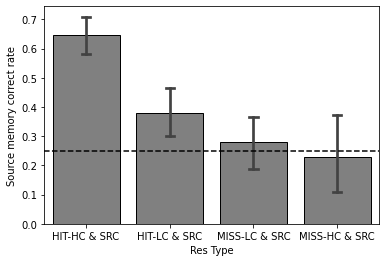

In [85]:
# The last plot

fig, ax1 = plt.subplots(figsize=(6,4))
bar = sns.barplot(x="Res Type", y="Source memory correct rate", data=Bulky2, color = 'gray', dodge=False, edgecolor='k', ax = ax1, capsize = 0.1)
plt.axhline(y=0.25, ls='--', c='k')